# このNotebookの目的
- Wine recognition datasetの簡単なEDAを行う

## wine recognation datasetについて
- このデータセットが集められた目的
    - ワインの成分によるワインの分類
- 欠損無し
- 各classの割合(classについては後述)
    - 1 : 0.398876
    - 0 : 0.331461
    - 2 : 0.269663
        - class1に対してclass2のデータ数が少ない
        - 可能であれば追加の必要有？
        - あるいは0を減らして行う必要有？

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

%matplotlib inline

# データの読み込み

In [7]:
from sklearn.datasets import load_wine

wine = load_wine()

In [29]:
# 説明文の表示
# print(wine.DESCR)

## どのようなデータか
- データ数: 178行
- 属性: 13
    - Alchol アルコール濃度
    - Malic acid リンゴ酸
    - Ash 灰(？)
    - Alcalinity of Ash 灰のアルカリ分(？)
    - Magnesium マグネシウム
    - Total phenols 総フェノール
    - Flavanoids フラボノイド
    - Nonflavanoid phenols フラボノイドでないフェノール
    - Proanthocyanins プロアントシアニジン
    - Color intensity 色の濃さ
    - Hue 色合い(色相)
    - OD280/OD315 of diluted wines 希釈したワインのOD280/OD350(？)
    - Proline プロリン
- class: 3
    - 3つの異なるイタリアの地域（耕作者も異なる）
    - ワインの等級は原産地など地域ごとに異なるためか？

In [35]:
# 集計操作で扱いやすくするためにDataFrameへ変換
df = pd.DataFrame(wine.data,
                 columns=["Alcohol",
                          "Malic_acid",
                          "Ash",
                          "Alcalinity of ash",  
                          "Magnesium",
                          "Total_phenols",
                          "Flavanoids",
                          "Nonflavanoid_phenols",
                          "Proanthocyanins",
                          "Color_intensity",
                          "Hue",
                          "OD280/OD315_of_diluted_wines",
                          "Proline"])
df.head()

,Alcohol,Malic_acid,Ash,Alcalinity of ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [52]:
# ワインをクラスごとに分類(0, 1, 2)
df["class"] = wine.target

# classを文字化
df["class"] = df["class"].map({
    0: "class_0",
    1: "class_1",
    2: "class_2"
})
df.head()

,Alcohol,Malic_acid,Ash,Alcalinity of ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [37]:
# 各classの割合
df["class"].value_counts(normalize=True)

1    0.398876
0    0.331461
2    0.269663
Name: class, dtype: float64

In [38]:
# 欠損の確認
# df.isnull().sum()
# なしだったのでこれはあとで削除

## データの可視化

In [39]:
# 数が多いのでとりあえずpandas_profiling
# ちょっとよくわからない
# import pandas_profiling

# pandas_profiling.ProfileReport(df)

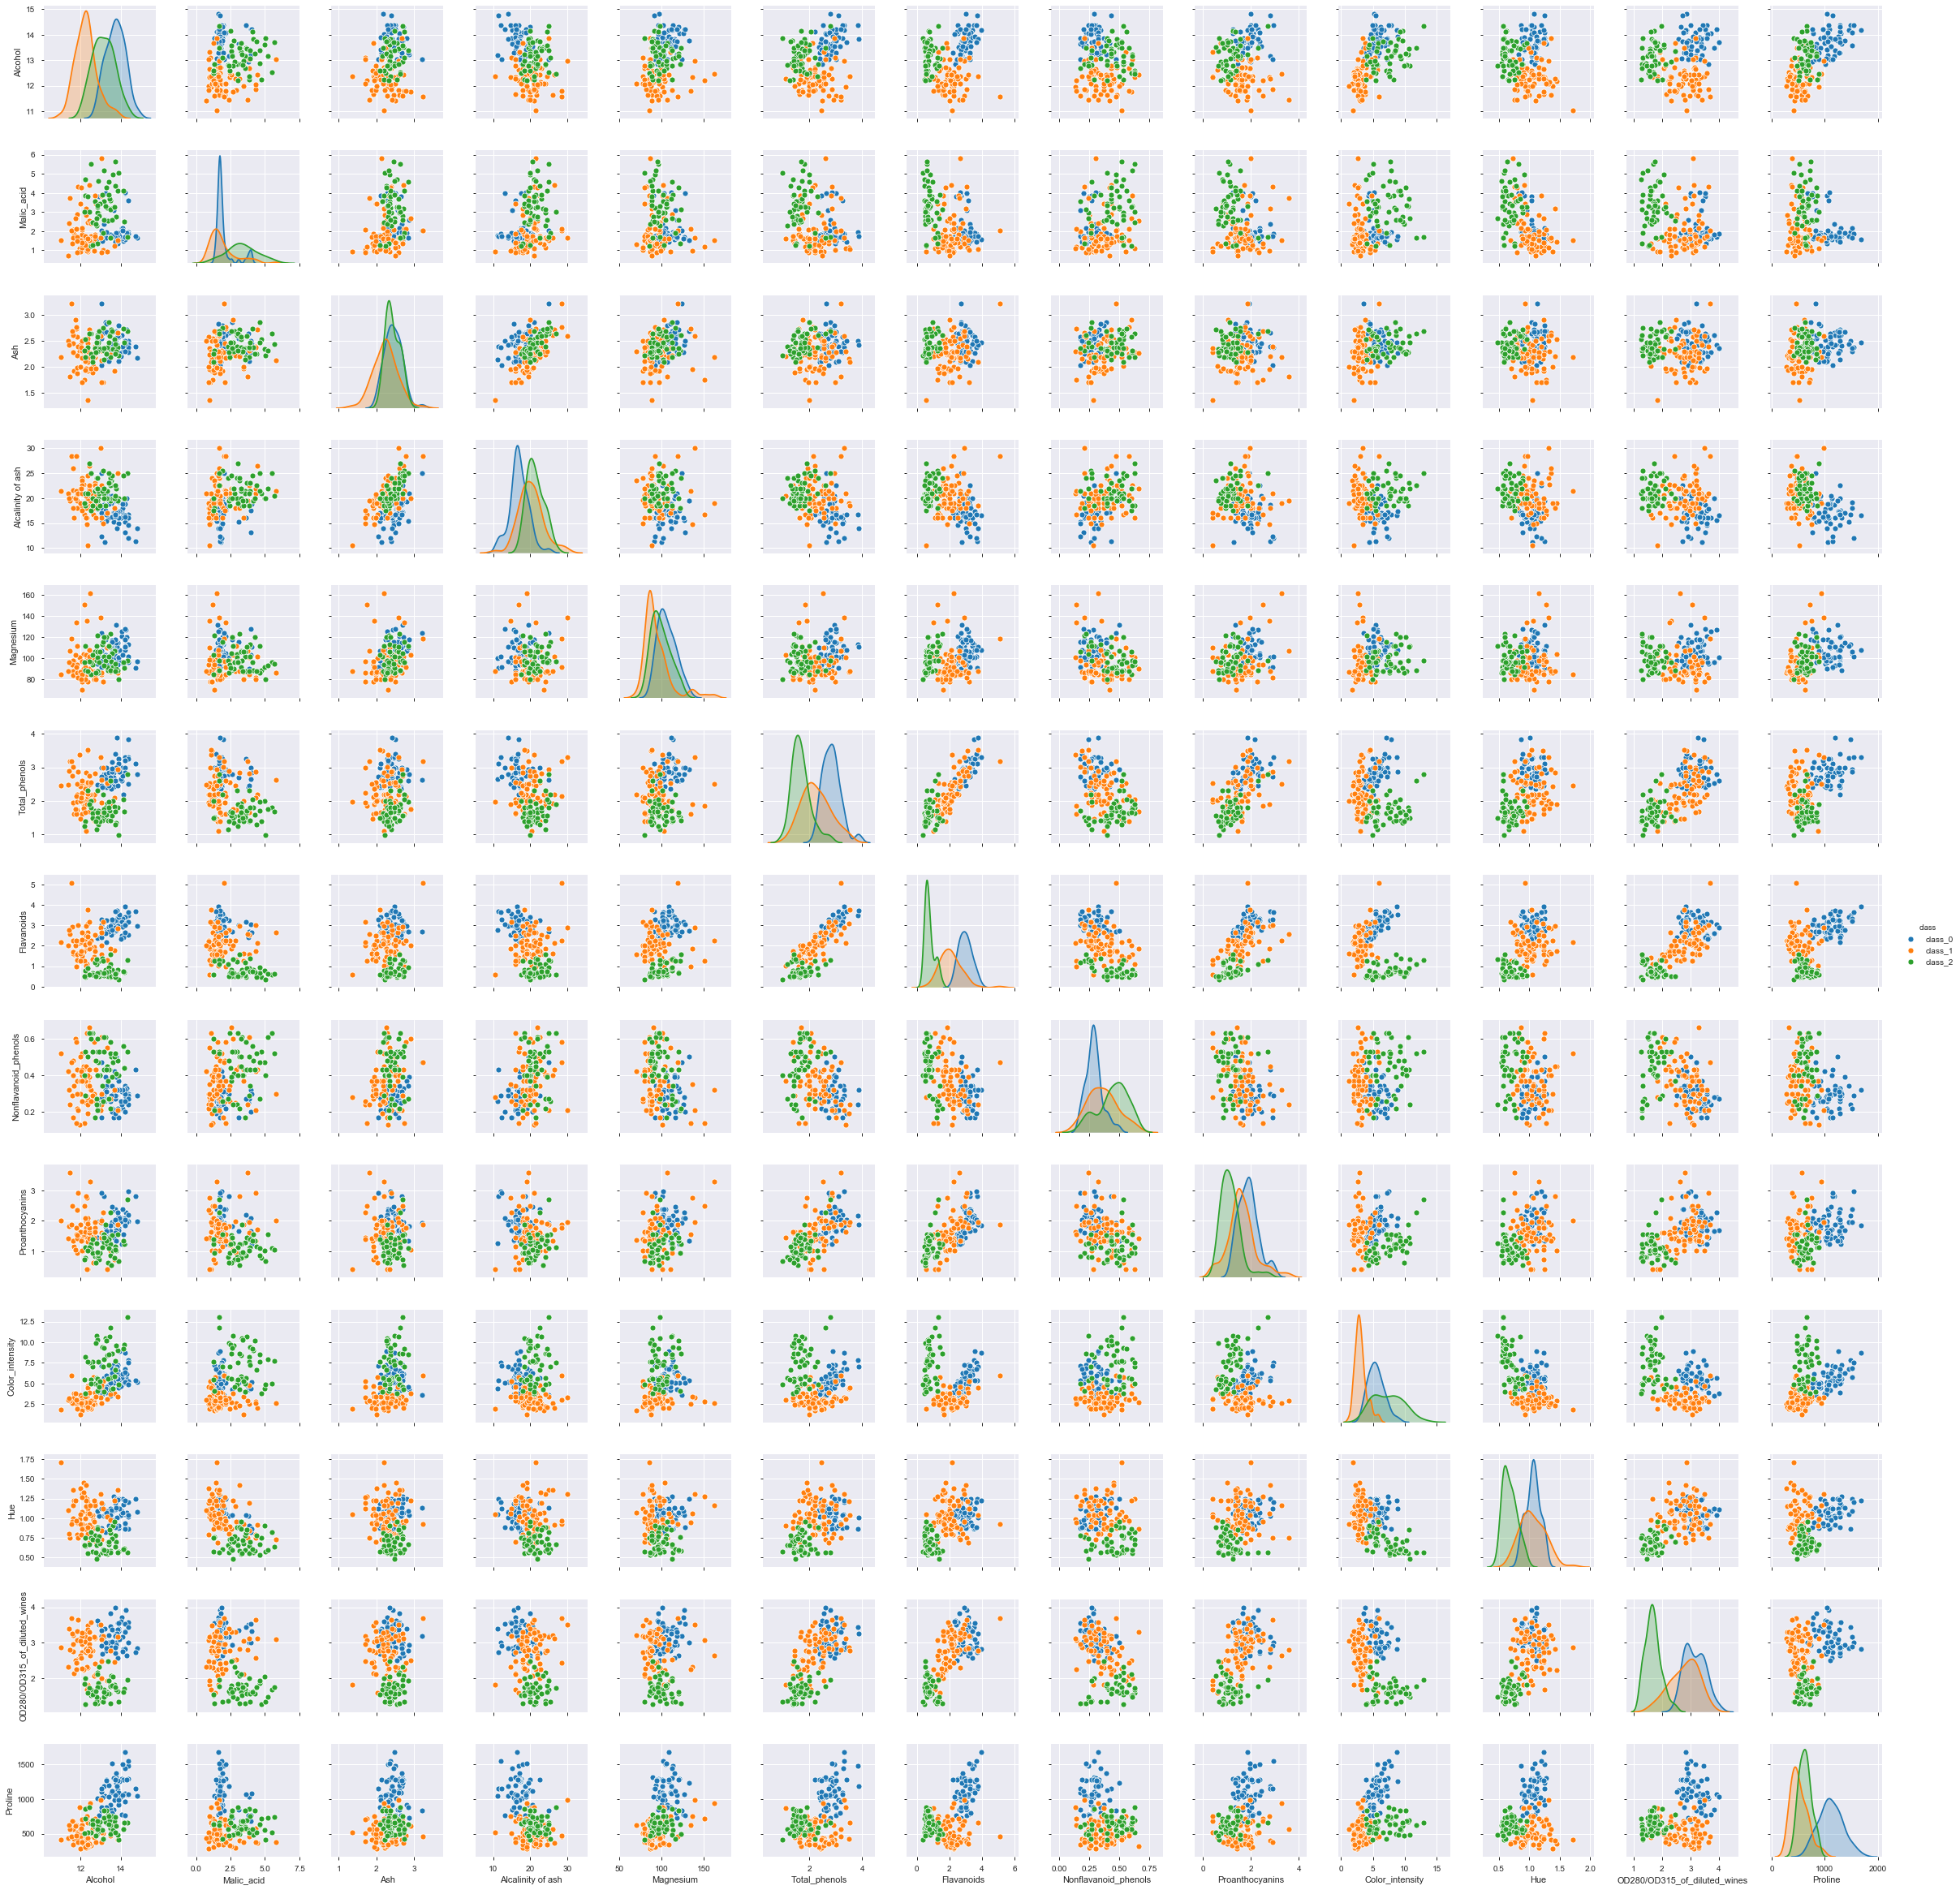

In [54]:
# ちょっとよくわからなかったのでグラフを表示
# 備忘録: class分類が数字だとclassもデータだと思われてclassもグラフ化されちゃうよ
# classのグラフは不要
sns.pairplot(df, hue="class")

## グラフより予想できること(特徴的なもの)
    1. malic_acid
        - class0が突出している
        - データ数が多いことを加味しても特徴的
    2. Color_intensity
        - class1が突出している
    3. flavanoids
        - class2が突出している
    4. AlcholとHueの2軸
        - 2次元的にclass分けが可能か
    5. FravanoidsとProlineの2軸
        - 2次元的にclass分けが可能か
    - データ数はclass1>class0>class2であることに注意

### Malic_acid

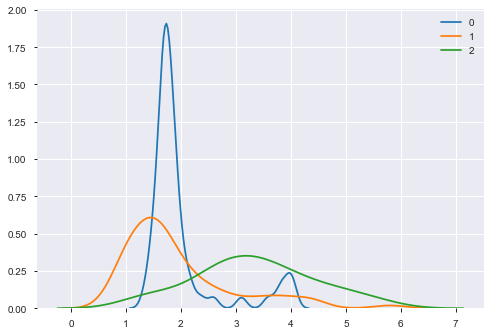

In [58]:
sns.kdeplot(df[df["class"] == "class_0"]["Malic_acid"], label="0")
sns.kdeplot(df[df["class"] == "class_1"]["Malic_acid"], label="1")
sns.kdeplot(df[df["class"] == "class_2"]["Malic_acid"], label="2")

### Color_intensity

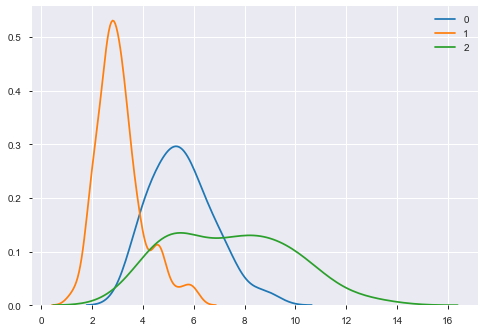

In [57]:
sns.kdeplot(df[df["class"] == "class_0"]["Color_intensity"], label="0")
sns.kdeplot(df[df["class"] == "class_1"]["Color_intensity"], label="1")
sns.kdeplot(df[df["class"] == "class_2"]["Color_intensity"], label="2")

### flavanoids


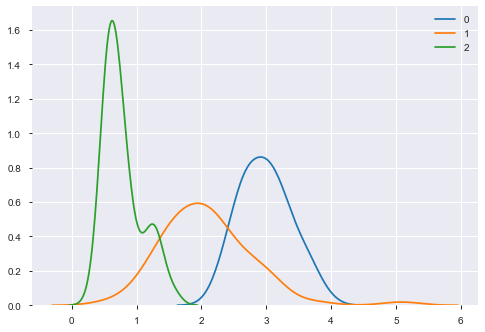

In [62]:
sns.kdeplot(df[df["class"] == "class_0"]["Flavanoids"], label="0")
sns.kdeplot(df[df["class"] == "class_1"]["Flavanoids"], label="1")
sns.kdeplot(df[df["class"] == "class_2"]["Flavanoids"], label="2")

#### 上記グラフよりわかること
- class0, class2の分類が可能

## 相関関係の可視化

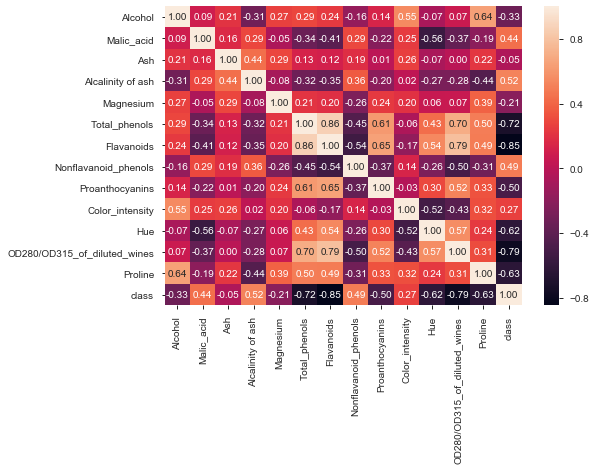

In [49]:
sns.heatmap(df.corr(),
            annot=True,
            fmt=".2f")

### 相関関係図よりわかること
    - 但し、直線的な関係しか現れないことに注意
    - 相関関係が0.7以上の属性
        - OD280/OD315_of_diluted_winesとTotal_phenols(0.70)
        - OD280/OD315_of_diluted_winesとFlavanoids(0.79)
        - FlavanoidsとTotal_phenols(0.86)
            - Flavanois(ポリフェノール)が多くなればTotal_phenol(総フェノール量)が多くなるのは自明
            - 総フェノールはポリフェノールを含むフェノール類の総量
            - FlavanoisとTotal_phenolは直線的な関係なので、class分けにはどちらかを用いればよい

## 考察
### ワインのクラス分けに使うことができると考えられる値
    - FlavanoidsあるいはTotal_phenolを用いたclass0とclass2の分類
    - Color_intensityはclass1が特徴的な値を持つ
        - 但し、他のclassと範囲を分かつわけではない
    - class1は広い範囲の値を持つため分類が難しい
        - 2値を組み合わせたグラフを用いた分類を行えば可能か
        - AlcholとHue, FravanoidsとProlineなど